<a href="https://colab.research.google.com/github/bbanzai88/Data-Science-Repository/blob/main/Climate_Impact_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is my initial Climate Impact Analysis Jupyter notebook. Enter your city and state location, run each cell and it will  tellyou if your location is in danger of being underwater due to rising sea levels and when the temperatures will exceed 10 degrees for more then 10  days straight..

In [8]:
#Install required libraries (run this in a Jupyter cell)
!pip install geopy requests matplotlib pip opencage xarray netCDF4 pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.7 MB/s eta 0:00:00


In [ ]:
'5d9274ba56fd402b9c2ab7a4bf573526' = opencage key

In [9]:
from opencage.geocoder import OpenCageGeocode

# Replace with your real API key from https://opencagedata.com/
OPENCAGE_API_KEY = '5d9274ba56fd402b9c2ab7a4bf573526'
geocoder = OpenCageGeocode(OPENCAGE_API_KEY)

def geocode_address(address):
    result = geocoder.geocode(address)
    if result and len(result):
        lat = result[0]['geometry']['lat']
        lon = result[0]['geometry']['lng']
        return lat, lon
    return None, None

# Example address
address = "Annapolis, MD" #enter your city location
lat, lon = geocode_address(address)
print(f"Coordinates of {address}: {lat}, {lon}")


Coordinates of Annapolis, MD: 38.9786401, -76.492786


In [10]:
import requests

def check_sea_level_risk(lat, lon, feet_rise):
    # Map the feet_rise to the corresponding service URL
    service_urls = {
        3: "https://coast.noaa.gov/arcgis/rest/services/dc_slr/slr_3ft/MapServer",
        10: "https://coast.noaa.gov/arcgis/rest/services/dc_slr/slr_10ft/MapServer"
    }

    if feet_rise not in service_urls:
        print(f"No service URL found for {feet_rise}ft sea level rise scenario.")
        return

    url = f"{service_urls[feet_rise]}/identify"

    params = {
        "f": "json",
        "geometry": f"{lon},{lat}",
        "geometryType": "esriGeometryPoint",
        "sr": "4326",
        "layers": "all",
        "tolerance": 1,
        "mapExtent": f"{lon-0.01},{lat-0.01},{lon+0.01},{lat+0.01}",
        "imageDisplay": "400,400,96",
        "returnGeometry": "false"
    }

    response = requests.get(url, params=params)
    if response.ok:
        data = response.json()
        if "results" in data and data["results"]:
            print(f"⚠️ Location is at risk under {feet_rise}ft sea level rise scenario.")
        else:
            print(f"✅ Location is not at risk under {feet_rise}ft sea level rise scenario.")
    else:
        print(f"Request failed with status code {response.status_code}")

# Example usage:
# Replace with actual latitude and longitude values
latitude = lat
longitude = lon
check_sea_level_risk(latitude, longitude, 3)


⚠️ Location is at risk under 3ft sea level rise scenario.


Sea Level Inundation Estimator

In [11]:

# =====================================
# This notebook:
# 1. Geocodes an address
# 2. Retrieves elevation via OpenTopography API
# 3. Loads IPCC SSP5-8.5 sea level rise projections
# 4. Estimates the year the location may be underwater

from opencage.geocoder import OpenCageGeocode
import requests
import pandas as pd

# ============================
# 🔧 Configuration
# ============================
ADDRESS = "Annapolis, MD"
OPENCAGE_API_KEY = "5d9274ba56fd402b9c2ab7a4bf573526"  # Replace with your key

# ============================
# 📍 Step 1: Geocode the Address
# ============================
geocoder = OpenCageGeocode(OPENCAGE_API_KEY)
result = geocoder.geocode(ADDRESS)
lat = result[0]['geometry']['lat']
lon = result[0]['geometry']['lng']
print(f"Coordinates: {lat}, {lon}")

# ============================
# ⛰️ Step 2: Get Elevation via OpenTopography API (test dataset)
# ============================
def get_elevation(lat, lon):
    url = "https://api.opentopodata.org/v1/test-dataset"
    params = {"locations": f"{lat},{lon}"}
    r = requests.get(url, params=params)
    if r.ok:
        return r.json()['results'][0]['elevation']
    return None

elevation_m = get_elevation(lat, lon)
print(f"Elevation at location: {elevation_m} meters")

# ============================
# 🌊 Step 3: Load IPCC SSP5-8.5 Sea Level Rise Projections
# ============================
# Approximate global mean sea level rise (meters) from NASA/IPCC
# Source: https://sealevel.nasa.gov/ipcc-ar6-sea-level-projection-tool
slr_projection_m = {
    2030: 0.23,
    2040: 0.35,
    2050: 0.49,
    2060: 0.66,
    2070: 0.84,
    2080: 1.03,
    2090: 1.23,
    2100: 1.44
}

# ============================
# 📅 Step 4: Estimate Inundation Year
# ============================
def estimate_inundation(elevation, slr_projection):
    for year, slr in slr_projection.items():
        if slr >= elevation:
            return year
    return None

inundation_year = estimate_inundation(elevation_m, slr_projection_m)

# ============================
# ✅ Step 5: Display Result
# ============================
if inundation_year:
    print(f"\n⚠️ Likely inundated by: {inundation_year} under SSP5-8.5")
else:
    print("\n✅ Not projected to be fully inundated by 2100 in SSP5-8.5 scenario")



Coordinates: 38.9786401, -76.492786
Elevation at location: 52.8683967590332 meters

✅ Not projected to be fully inundated by 2100 in SSP5-8.5 scenario


In [13]:
!wget wget https://nex-gddp-cmip6.s3.us-west-2.amazonaws.com/NEX-GDDP-CMIP6/ACCESS-CM2/ssp585/r1i1p1f1/tasmax/tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2050.nc



--2025-05-29 19:42:40--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2025-05-29 19:42:40--  https://nex-gddp-cmip6.s3.us-west-2.amazonaws.com/NEX-GDDP-CMIP6/ACCESS-CM2/ssp585/r1i1p1f1/tasmax/tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2050.nc
Resolving nex-gddp-cmip6.s3.us-west-2.amazonaws.com (nex-gddp-cmip6.s3.us-west-2.amazonaws.com)... 3.5.85.7, 52.92.148.66, 3.5.82.129, ...
Connecting to nex-gddp-cmip6.s3.us-west-2.amazonaws.com (nex-gddp-cmip6.s3.us-west-2.amazonaws.com)|3.5.85.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244210393 (233M) [application/x-netcdf]
Saving to: ‘tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2050.nc’

tasmax_day_ACCESS-C 100%[===================>] 232.90M  8.91MB/s    in 22s     

2025-05-29 19:43:03 (10.5 MB/s) - ‘tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2050.nc’ saved [244210393/244210393]

FINISHED --2025-05-29 19:43:03--
Total wall clock time: 23s
Downl

<ipython-input-14-85c1e962b5ba>:22: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  hot_days_per_year = df['hot_day'].resample('Y').sum()
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


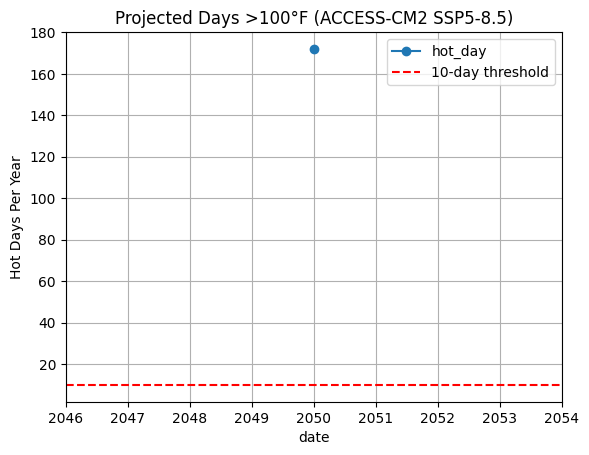

In [14]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Open the NetCDF file
ds = xr.open_dataset("tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2050.nc")

# Convert from Kelvin to Celsius
tasmax_c = ds['tasmax'] - 273.15

# Select nearest point to your location (Miami Beach)
lat, lon = 25.7617, -80.1918
point_data = tasmax_c.sel(lat=lat, lon=lon, method='nearest')

# Convert to DataFrame
df = point_data.to_dataframe().reset_index()
df['date'] = pd.to_datetime(df['time'])
df.set_index('date', inplace=True)

# Count days over 100°F
df['hot_day'] = df['tasmax'] > 37.8
hot_days_per_year = df['hot_day'].resample('Y').sum()

# Plot
hot_days_per_year.plot(marker='o')
plt.axhline(10, color='red', linestyle='--', label='10-day threshold')
plt.title("Projected Days >100°F (ACCESS-CM2 SSP5-8.5)")
plt.ylabel("Hot Days Per Year")
plt.grid(True)
plt.legend()
plt.show()


⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2000.nc...
⚠️ Skipped tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2000.nc (not found)
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2010.nc...
⚠️ Skipped tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2010.nc (not found)
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2020.nc...
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2030.nc...
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2040.nc...
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2050.nc...
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2060.nc...
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2070.nc...
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2080.nc...
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2090.nc...
⬇️ Downloading tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_2100.nc...


<ipython-input-15-d807a3f259d3>:63: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  hot_days_per_year = df['hot_day'].resample('Y').sum()


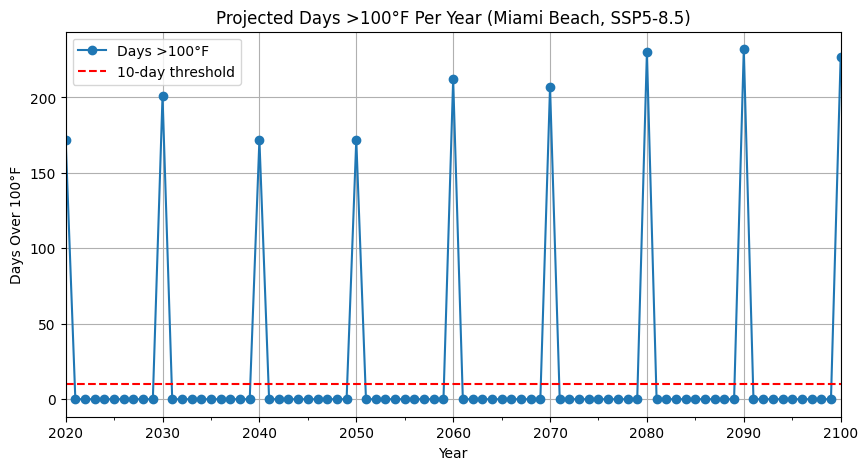

🌡️ First year with ≥10 days over 100°F: 2020
🌡️ First year with ≥50 days over 100°F: 2020
🌡️ First year with ≥100 days over 100°F: 2020


In [15]:
# 🔥 CMIP6 100°F Temperature Projection using NetCDF
# Analyze how often a location exceeds 100°F and when that trend accelerates under various scenarios

# Step 1: Install Required Libraries
!pip install xarray netCDF4 pandas matplotlib --quiet

# Step 2: Import Libraries
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os
import requests
from bs4 import BeautifulSoup

# Step 2.5: Find available NetCDF files online
# Set base URL and local folder
BASE_URL = "https://nex-gddp-cmip6.s3.us-west-2.amazonaws.com/NEX-GDDP-CMIP6/ACCESS-CM2/ssp585/r1i1p1f1/tasmax/"
os.makedirs("cmip6_data", exist_ok=True)

# Define expected files (every 10 years)
years = range(2000, 2101, 10)
file_list = [f"tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_{year}.nc" for year in years]

# Download only missing files
downloaded_files = []
for fname in file_list:
    local_path = os.path.join("cmip6_data", fname)
    file_url = BASE_URL + fname

    if not os.path.exists(local_path):
        print(f"⬇️ Downloading {fname}...")
        r = requests.get(file_url)
        if r.status_code == 200:
            with open(local_path, "wb") as f:
                f.write(r.content)
        else:
            print(f"⚠️ Skipped {fname} (not found)")
            continue
    else:
        print(f"✔️ Already downloaded: {fname}")
    downloaded_files.append(local_path)

# Step 3: Load NetCDF files for multiple decades (update paths as needed)
# Example files: tasmax_day_ACCESS-CM2_ssp585_2020.nc to 2100
files = downloaded_files  # All the files we just fetched

ds = xr.open_mfdataset(files, combine='by_coords')

# Step 4: Convert from Kelvin to Celsius
tasmax_c = ds['tasmax'] - 273.15

# Step 5: Select location (e.g., Miami Beach)
lat, lon = lat,lon
point_data = tasmax_c.sel(lat=lat, lon=lon, method='nearest')

# Step 6: Convert to DataFrame
df = point_data.to_dataframe().reset_index()
df['date'] = pd.to_datetime(df['time'])
df.set_index('date', inplace=True)

# Step 7: Count hot days per year (100°F = 37.8°C)
df['hot_day'] = df['tasmax'] > 37.8
hot_days_per_year = df['hot_day'].resample('Y').sum()

# Step 8: Plot the trend
plt.figure(figsize=(10,5))
hot_days_per_year.plot(marker='o', label='Days >100°F')
plt.axhline(10, color='red', linestyle='--', label='10-day threshold')
plt.title("Projected Days >100°F Per Year (Miami Beach, SSP5-8.5)")
plt.ylabel("Days Over 100°F")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.show()

# Step 9: Detect acceleration in trend (first year >10, >50, >100 days)
thresholds = [10, 50, 100]
for t in thresholds:
    for year, days in hot_days_per_year.items():
        if days >= t:
            print(f"🌡️ First year with ≥{t} days over 100°F: {year.year}")
            break


Elevation for location (25.7617, -80.1918): -277.02 meters

⚠️ This location may be submerged by year 2020 under SSP5-8.5.


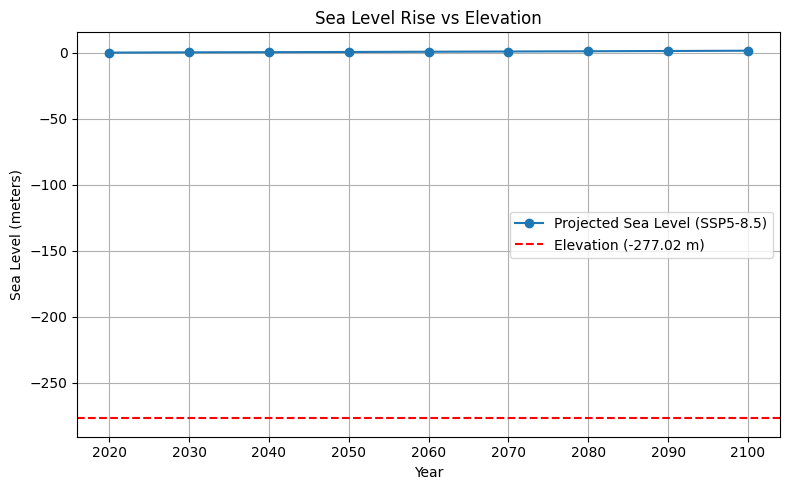

In [16]:
# 🌊 Sea Level Rise Submersion Estimator by Location (SSP5-8.5 scenario only)
# -------------------------------------------------------------
# This script estimates when a given location may be overtaken by sea level rise projections
# using elevation data and IPCC SSP5-8.5 global mean projections.

import requests
import matplotlib.pyplot as plt

# Step 1: Get elevation using OpenTopodata test dataset (or replace with real API)
def get_elevation(lat, lon):
    url = f"https://api.opentopodata.org/v1/test-dataset?locations={lat},{lon}"
    r = requests.get(url)
    if r.ok:
        elevation = r.json()['results'][0]['elevation']
        return elevation
    else:
        raise Exception("Failed to retrieve elevation")

# Example location: Miami Beach, FL
#lat, lon = 25.790, -80.130
elevation_m = get_elevation(lat, lon)
print(f"Elevation for location ({lat}, {lon}): {elevation_m:.2f} meters")

# Step 2: Define SSP5-8.5 sea level rise projection (in meters)
slr_projection_m = {
    2020: 0.0,
    2030: 0.23,
    2040: 0.35,
    2050: 0.49,
    2060: 0.66,
    2070: 0.84,
    2080: 1.03,
    2090: 1.23,
    2100: 1.44
}

# Step 3: Estimate year of submersion
def estimate_inundation_year(elevation, projections):
    for year, slr in projections.items():
        if slr >= elevation:
            return year
    return None

submersion_year = estimate_inundation_year(elevation_m, slr_projection_m)

# Step 4: Display result
if submersion_year:
    print(f"\n⚠️ This location may be submerged by year {submersion_year} under SSP5-8.5.")
else:
    print("\n✅ This location is not projected to be fully submerged by 2100.")

# Step 5: Plot the sea level rise vs elevation
years = list(slr_projection_m.keys())
levels = list(slr_projection_m.values())

plt.figure(figsize=(8,5))
plt.plot(years, levels, marker='o', label='Projected Sea Level (SSP5-8.5)')
plt.axhline(y=elevation_m, color='red', linestyle='--', label=f'Elevation ({elevation_m:.2f} m)')
plt.title('Sea Level Rise vs Elevation')
plt.xlabel('Year')
plt.ylabel('Sea Level (meters)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Elevation for location (25.7617, -80.1918): -277.02 meters

Estimated year of submersion by scenario:
⚠️ SSP1-2.6: submerged by 2020
⚠️ SSP2-4.5: submerged by 2020
⚠️ SSP5-8.5: submerged by 2020


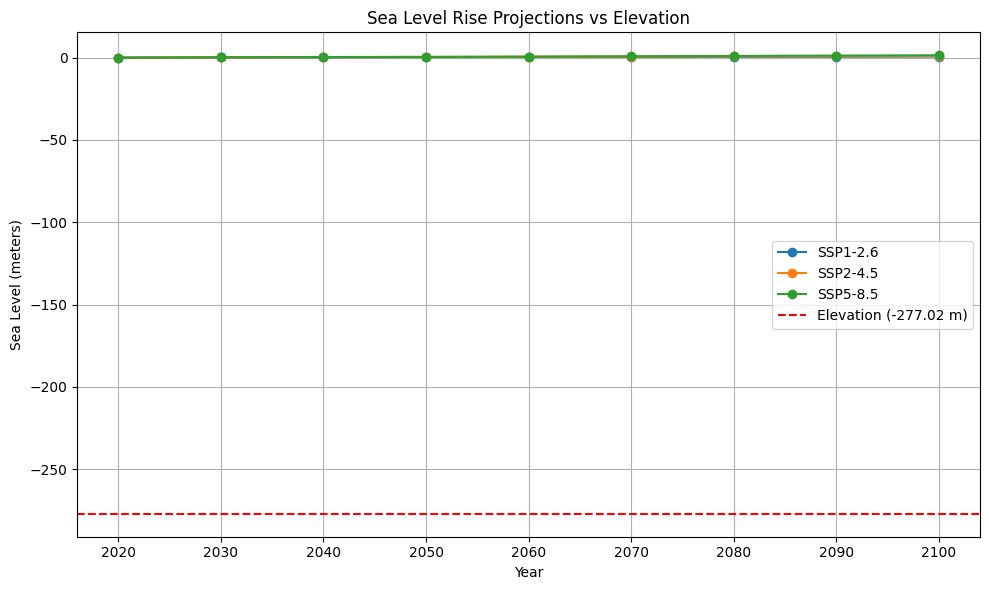

In [17]:
# 🌊 Sea Level Rise Submersion Estimator by Location (Multi-Scenario)
# -------------------------------------------------------------
# This script estimates when a given location may be overtaken by sea level rise projections
# using elevation data and IPCC global mean projections across multiple SSP scenarios.

import requests
import matplotlib.pyplot as plt

# Step 1: Get elevation using OpenTopodata test dataset (or replace with real API)
def get_elevation(lat, lon):
    url = f"https://api.opentopodata.org/v1/test-dataset?locations={lat},{lon}"
    r = requests.get(url)
    if r.ok:
        elevation = r.json()['results'][0]['elevation']
        return elevation
    else:
        raise Exception("Failed to retrieve elevation")

# Example location: Miami Beach, FL
lat, lon = lat, lon
elevation_m = get_elevation(lat, lon)
print(f"Elevation for location ({lat}, {lon}): {elevation_m:.2f} meters")

# Step 2: Define sea level rise projections (in meters) for multiple scenarios
slr_scenarios = {
    'SSP1-2.6': {
        2020: 0.0, 2030: 0.12, 2040: 0.19, 2050: 0.27, 2060: 0.35,
        2070: 0.43, 2080: 0.51, 2090: 0.59, 2100: 0.66
    },
    'SSP2-4.5': {
        2020: 0.0, 2030: 0.16, 2040: 0.26, 2050: 0.36, 2060: 0.48,
        2070: 0.60, 2080: 0.73, 2090: 0.86, 2100: 1.00
    },
    'SSP5-8.5': {
        2020: 0.0, 2030: 0.23, 2040: 0.35, 2050: 0.49, 2060: 0.66,
        2070: 0.84, 2080: 1.03, 2090: 1.23, 2100: 1.44
    }
}

# Step 3: Estimate year of submersion for each scenario
submersion_results = {}
for scenario, projections in slr_scenarios.items():
    for year, slr in projections.items():
        if slr >= elevation_m:
            submersion_results[scenario] = year
            break
    else:
        submersion_results[scenario] = None

# Step 4: Display results
print("\nEstimated year of submersion by scenario:")
for scenario, year in submersion_results.items():
    if year:
        print(f"⚠️ {scenario}: submerged by {year}")
    else:
        print(f"✅ {scenario}: not submerged by 2100")

# Step 5: Plot all sea level projections vs elevation
plt.figure(figsize=(10,6))
for scenario, projections in slr_scenarios.items():
    years = list(projections.keys())
    levels = list(projections.values())
    plt.plot(years, levels, marker='o', label=f'{scenario}')

plt.axhline(y=elevation_m, color='red', linestyle='--', label=f'Elevation ({elevation_m:.2f} m)')
plt.title('Sea Level Rise Projections vs Elevation')
plt.xlabel('Year')
plt.ylabel('Sea Level (meters)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Elevation for location (25.7617, -80.1918): -277.02 meters

Estimated year of submersion by scenario:
⚠️ SSP1-2.6: submerged by 2020
⚠️ SSP2-4.5: submerged by 2020
⚠️ SSP5-8.5: submerged by 2020


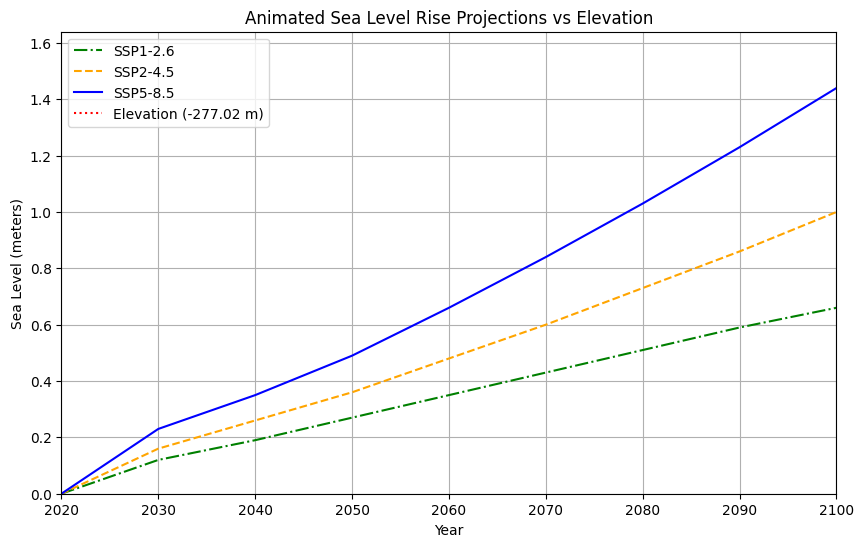

In [18]:
# 🌊 Sea Level Rise Submersion Estimator by Location (Multi-Scenario, Static)
# -------------------------------------------------------------
# This script estimates when a given location may be overtaken by sea level rise projections
# using elevation data and IPCC global mean projections across multiple SSP scenarios.

import requests
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Step 1: Get elevation using OpenTopodata test dataset (or replace with real API)
def get_elevation(lat, lon):
    url = f"https://api.opentopodata.org/v1/test-dataset?locations={lat},{lon}"
    r = requests.get(url)
    if r.ok:
        elevation = r.json()['results'][0]['elevation']
        return elevation
    else:
        raise Exception("Failed to retrieve elevation")

# Example location: Miami Beach, FL
lat, lon = lat, lon
elevation_m = get_elevation(lat, lon)
print(f"Elevation for location ({lat}, {lon}): {elevation_m:.2f} meters")

# Step 2: Define sea level rise projections (in meters) for multiple scenarios
slr_scenarios = {
    'SSP1-2.6': {
        2020: 0.0, 2030: 0.12, 2040: 0.19, 2050: 0.27, 2060: 0.35,
        2070: 0.43, 2080: 0.51, 2090: 0.59, 2100: 0.66
    },
    'SSP2-4.5': {
        2020: 0.0, 2030: 0.16, 2040: 0.26, 2050: 0.36, 2060: 0.48,
        2070: 0.60, 2080: 0.73, 2090: 0.86, 2100: 1.00
    },
    'SSP5-8.5': {
        2020: 0.0, 2030: 0.23, 2040: 0.35, 2050: 0.49, 2060: 0.66,
        2070: 0.84, 2080: 1.03, 2090: 1.23, 2100: 1.44
    }
}

# Step 3: Estimate year of submersion for each scenario
submersion_results = {}
for scenario, projections in slr_scenarios.items():
    for year, slr in projections.items():
        if slr >= elevation_m:
            submersion_results[scenario] = year
            break
    else:
        submersion_results[scenario] = None

# Step 4: Display results
print("\nEstimated year of submersion by scenario:")
for scenario, year in submersion_results.items():
    if year:
        print(f"⚠️ {scenario}: submerged by {year}")
    else:
        print(f"✅ {scenario}: not submerged by 2100")

# Step 5: Animate sea level rise
fig, ax = plt.subplots(figsize=(10,6))
colors = {'SSP1-2.6': 'green', 'SSP2-4.5': 'orange', 'SSP5-8.5': 'blue'}
linestyles = {'SSP1-2.6': '-.', 'SSP2-4.5': '--', 'SSP5-8.5': '-'}
lines = {scenario: ax.plot([], [], label=scenario, color=colors[scenario], linestyle=linestyles[scenario])[0] for scenario in slr_scenarios}

ax.axhline(y=elevation_m, color='red', linestyle=':', label=f'Elevation ({elevation_m:.2f} m)')
ax.set_xlim(2020, 2100)
ax.set_ylim(0, max(max(slr.values()) for slr in slr_scenarios.values()) + 0.2)
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (meters)')
ax.set_title('Animated Sea Level Rise Projections vs Elevation')
ax.grid(True)
ax.legend()

# Prepare data per scenario
scenario_data = {s: (list(v.keys()), list(v.values())) for s, v in slr_scenarios.items()}
max_frames = len(next(iter(slr_scenarios.values())))

# Animation function
x_data = {s: [] for s in slr_scenarios}
y_data = {s: [] for s in slr_scenarios}

for scenario, line in lines.items():
    years, levels = scenario_data[scenario]
    line.set_data(years, levels)

plt.draw()
plt.pause(0.001)  # Needed for some backends to render
plt.show()


In [19]:
# 🌊 Sea Level Rise Submersion Estimator by Location (Multi-Scenario + Animation)
# --------------------------------------------------------------------------------
# This script estimates when a given location may be overtaken by sea level rise projections
# using elevation data and IPCC global mean projections across multiple SSP scenarios,
# and animates the sea level trends over time.

import requests
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML  # <- needed to display animation in notebooks

# Step 1: Get elevation using OpenTopodata test dataset (or replace with real API)
def get_elevation(lat, lon):
    url = f"https://api.opentopodata.org/v1/test-dataset?locations={lat},{lon}"
    r = requests.get(url)
    if r.ok:
        elevation = r.json()['results'][0]['elevation']
        return elevation
    else:
        raise Exception("Failed to retrieve elevation")

# Example location: Miami Beach, FL
lat, lon = lat, lon
elevation_m = get_elevation(lat, lon)
print(f"Elevation for location ({lat}, {lon}): {elevation_m:.2f} meters")

# Step 2: Define sea level rise projections (in meters) for multiple scenarios
slr_scenarios = {
    'SSP1-2.6': {
        2020: 0.0, 2030: 0.12, 2040: 0.19, 2050: 0.27, 2060: 0.35,
        2070: 0.43, 2080: 0.51, 2090: 0.59, 2100: 0.66
    },
    'SSP2-4.5': {
        2020: 0.0, 2030: 0.16, 2040: 0.26, 2050: 0.36, 2060: 0.48,
        2070: 0.60, 2080: 0.73, 2090: 0.86, 2100: 1.00
    },
    'SSP5-8.5': {
        2020: 0.0, 2030: 0.23, 2040: 0.35, 2050: 0.49, 2060: 0.66,
        2070: 0.84, 2080: 1.03, 2090: 1.23, 2100: 1.44
    }
}

# Step 3: Estimate year of submersion for each scenario
submersion_results = {}
for scenario, projections in slr_scenarios.items():
    for year, slr in projections.items():
        if slr >= elevation_m:
            submersion_results[scenario] = year
            break
    else:
        submersion_results[scenario] = None

# Step 4: Display results
print("\nEstimated year of submersion by scenario:")
for scenario, year in submersion_results.items():
    if year:
        print(f"⚠️ {scenario}: submerged by {year}")
    else:
        print(f"✅ {scenario}: not submerged by 2100")

# Step 5: Animate sea level rise
fig, ax = plt.subplots(figsize=(10,6))
colors = {'SSP1-2.6': 'green', 'SSP2-4.5': 'orange', 'SSP5-8.5': 'blue'}
linestyles = {'SSP1-2.6': '-.', 'SSP2-4.5': '--', 'SSP5-8.5': '-'}
lines = {scenario: ax.plot([], [], label=scenario, color=colors[scenario], linestyle=linestyles[scenario])[0] for scenario in slr_scenarios}

ax.axhline(y=elevation_m, color='red', linestyle=':', label=f'Elevation ({elevation_m:.2f} m)')
ax.set_xlim(2020, 2100)
ax.set_ylim(0, max(max(slr.values()) for slr in slr_scenarios.values()) + 0.2)
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (meters)')
ax.set_title('Animated Sea Level Rise Projections vs Elevation')
ax.grid(True)
ax.legend()

# Prepare data per scenario
scenario_data = {s: (list(v.keys()), list(v.values())) for s, v in slr_scenarios.items()}
x_data = {s: [] for s in slr_scenarios}
y_data = {s: [] for s in slr_scenarios}

# Animation function
def update(frame):
    for scenario, line in lines.items():
        years, levels = scenario_data[scenario]
        if frame < len(years):
            x_data[scenario].append(years[frame])
            y_data[scenario].append(levels[frame])
            line.set_data(x_data[scenario], y_data[scenario])
    return list(lines.values())

anim = animation.FuncAnimation(fig, update, frames=len(next(iter(slr_scenarios.values()))), interval=800, blit=False)
plt.close(fig)  # Prevent duplicate static plot in notebooks
HTML(anim.to_jshtml())


Elevation for location (25.7617, -80.1918): -277.02 meters

Estimated year of submersion by scenario:
⚠️ SSP1-2.6: submerged by 2020
⚠️ SSP2-4.5: submerged by 2020
⚠️ SSP5-8.5: submerged by 2020
